# Data Expolration


In [4]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# sns.set()

In [5]:
train = pd.read_csv('../Data/train.csv')
trainCount = train.shape[0]
print("Train set shape: ", train.shape)
train[:10]

Train set shape:  (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


### Вижда се, че имаме само текста на коментара и 6-те категории, за които трябва да дадем вероятност.

### Какъв брой коментари има във всяка категория?

In [6]:
import random

def show_data(frame, name):
    print(name,'comments shape:', frame.shape)
    print("{0:.2f}% of all comments".format(frame.shape[0]/trainCount * 100))
    print("Example:", frame.iloc[random.randint(0, frame.shape[0] - 1),1])
#     return frame[:5]    

In [7]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

def plot_wordcloud_mask(words, img_path):
    img = Image.open(img_path)
    img_mask = np.array(img)

    plt.figure(figsize=(12,8))
    wc = WordCloud(background_color="black", max_words=10000, mask=img_mask,
                   stopwords=STOPWORDS, max_font_size= 40)
    wc.generate(" ".join(words))
    plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
    plt.axis('off');

Toxic comments shape: (15294, 8)
9.58% of all comments
Example: your mom is my slave and your father is my bitch 

you all shall bow down to me and your mothers will suck my balls. your father is my slave and i will drive him into the ground with my forhead. as you look upon this page and gasp i enter your soul and devour your flesh.


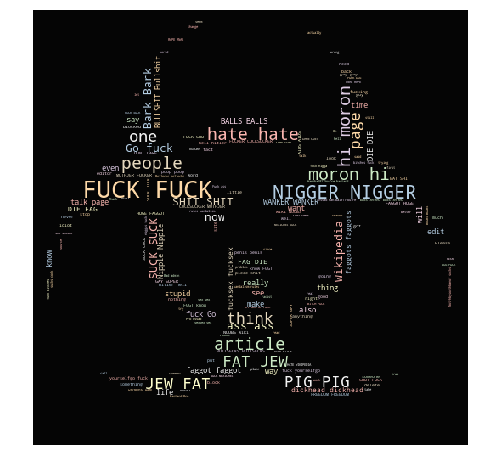

In [8]:
toxic = train[train.toxic == 1]
show_data(toxic, 'Toxic')
plot_wordcloud_mask(toxic.comment_text, '../Images/toxic.png')

Severe toxic comments shape: (1595, 8)
1.00% of all comments
Example: ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     
ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     
ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     
ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     
ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     
ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     
ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     ANAL RAPE     

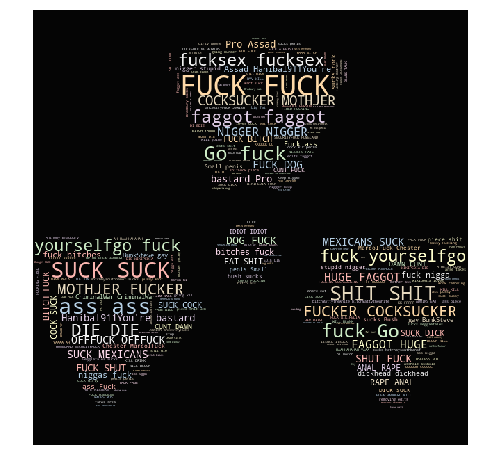

In [9]:
severe_toxic = train[train.severe_toxic == 1]
show_data(severe_toxic, 'Severe toxic')
plot_wordcloud_mask(severe_toxic.comment_text, '../Images/toxic2.jpg')

Obscene comments shape: (8449, 8)
5.29% of all comments
Example: fucking die 

lol rofl 
joke

hahahahahahahaha

 U cant stop the vandal == though


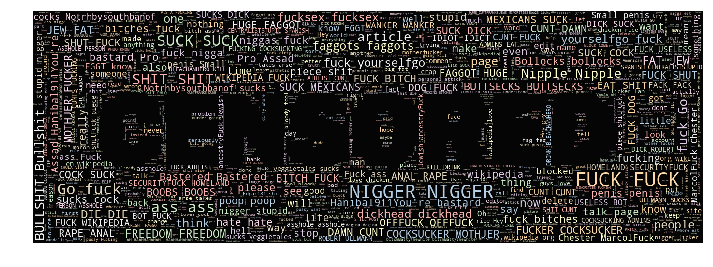

In [10]:
obscene = train[train.obscene == 1]
show_data(obscene, 'Obscene')
plot_wordcloud_mask(obscene.comment_text, '../Images/censored.png')

Threat comments shape: (478, 8)
0.30% of all comments
Example: I'm going to track you down 

I am going to track you down and do horrible violent things to you. This is a sincere threat which I would take seriously if I were you.

BEHEAD THOSE WHO INSULT ISLAM 82.165.144.51


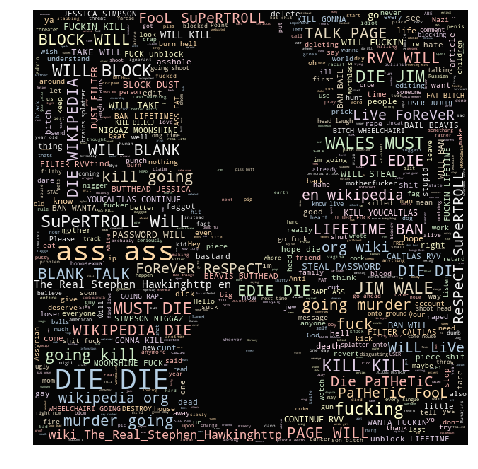

In [11]:
threat = train[train.threat == 1]
show_data(threat, 'Threat')
plot_wordcloud_mask(threat.comment_text, '../Images/exclem.jpg')

Insult comments shape: (7877, 8)
4.94% of all comments
Example: You horrid little shit 

I've been monitoring your editing patterns like a true stalker, and have noted that you made no edits between 15th and 19th June. Perhaps you might like to comment on the reasons behind this? 94.4.112.99


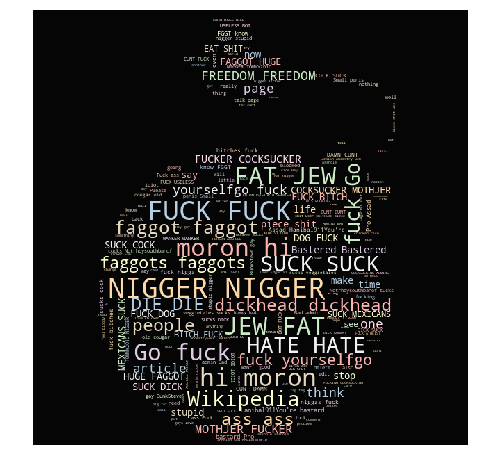

In [12]:
insult = train[train.insult == 1]
show_data(insult, 'Insult')
plot_wordcloud_mask(insult.comment_text, '../Images/bomb.jpg')

Identity hate comments shape: (1405, 8)
0.88% of all comments
Example: YOU HAVE NO RIGHT FOR Your RACIST block Syrthiss!!  Iguarantee that Jimbo will hear about this and you shalll be punished accordingly!  White Hoods like you DONT belong in WIKI!  Your CYBERLYNCHING DAYS R Over You Racist Jerk!


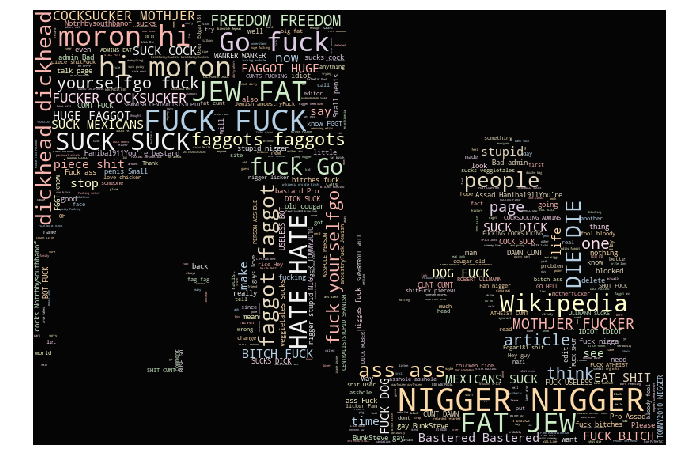

In [13]:
identity_hate = train[train.identity_hate == 1]
show_data(identity_hate, 'Identity hate')
plot_wordcloud_mask(insult.comment_text, '../Images/hate.png')

Clear comments shape: (143346, 8)
89.83% of all comments
Example: Hi,

Please stop vandalizing Wikipedia articles or you will be blocked.


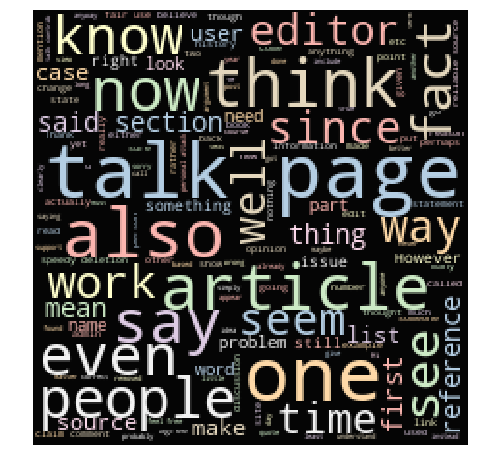

In [15]:
clear = train[train.toxic + train.identity_hate + train.severe_toxic + train.obscene + train.threat + train.insult == 0]
show_data(clear, 'Clear')
plot_wordcloud_mask(clear.comment_text, '../Images/safe.png')

## 90% от коментарите не са токсични, някои класове са под 1% от записите..
### Това може да бъде проблем за модела
#### Идеи за справяне:
- Да се увеличи броя на токсичните (и други тагове) коментари
- Да се изравни броя коментари от всеки клас

#### Други идеи:
- Да се изчистят коментарите от ненужни данни (линкове, ip адреси, пунктуация)

## Да видим най-токсичните коментари

Max toxicity comments shape: (31, 8)
0.02% of all comments
Example: SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!


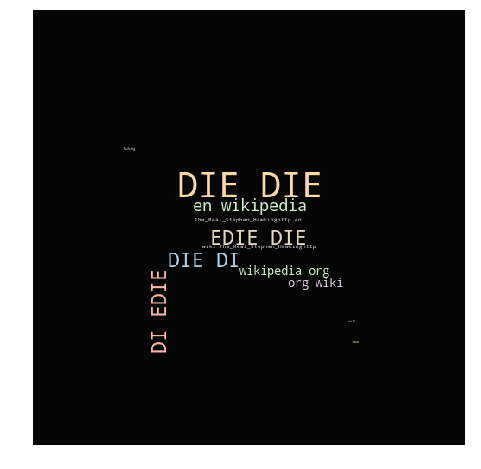

In [16]:
max_toxicity = train[train.toxic + train.identity_hate + train.severe_toxic + train.obscene + train.threat + train.insult == 6]
show_data(max_toxicity, 'Max toxicity')
plot_wordcloud_mask(max_toxicity.comment_text, '../Images/cross.jpg')

## А сега тест данните:

In [17]:
test = pd.read_csv('../Data/test.csv')
print("Test set shape: ", test.shape)
test[:5]

Test set shape:  (153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


## Дали има липсващи данни

In [18]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [19]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

## Брой думи на коментар

Min Count: 1
Mean Count: 67.86696204197504
Max Count: 2273


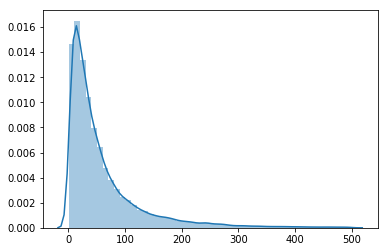

In [45]:
comment_counts = list(map(lambda x: len(x), train.comment_text.str.split(' ')))
less_than_500 = list(filter(lambda y: y<500, comment_counts))
print('Min Count:', np.min(comment_counts))
print('Mean Count:', np.mean(comment_counts))
print('Max Count:', np.max(comment_counts))
sns.distplot(less_than_500)